In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes

In [2]:
# loading and reading the data path and saving as a variable
file_path = '/Users/aryellewright/Documents/Documents - Aryelle’s MacBook Air/Kumar-Biomaterials-Lab/DLS_Plots/20240122_DLS_DIP_Serum.xlsx'
sheet_name = "Sheet1"  

# reading and saving data from specific excel sheet
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [3]:
polymer = df['Polymer'][::-1]
diameter = df['Effective Diameter Avg.'][::-1]
stdev = df['Stddev'][::-1]

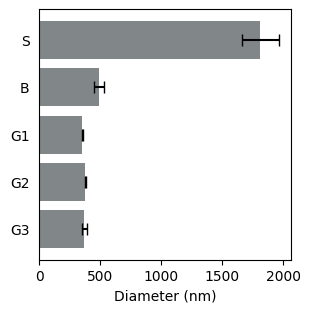

In [4]:
color_gray = "#818689"
plt.figure(figsize=(3.25, 3.25))

plt.barh(polymer, diameter, xerr=stdev, capsize = 4, color=color_gray)

plt.yticks(df['Polymer'], size=10)
plt.tick_params(left=False)
plt.xticks(size=10)
plt.xlabel('Diameter (nm)', size=10)

plt.show()

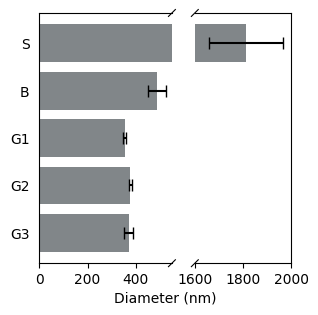

In [5]:
color_gray = "#818689"
plt.figure(figsize=(3.25, 3.25))

bax = brokenaxes(xlims=((0, 550), (1600, 2000)), hspace=0.1, despine=False)
bax.barh(polymer, diameter, xerr=stdev, capsize=4, color=color_gray)

# remove ticks on left side
for sax in bax.axs:
    sax.tick_params(left=False)

bax.big_ax.set_xlabel('Diameter (nm)', size=10, labelpad=20)

plt.show()